<a href="https://colab.research.google.com/github/tfysekis/Data-Mining/blob/master/Mining_Knowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1. Transformation and analysis of raw data**

We download the contect of the .csv file that we are working on (GroceriesInitial.csv)

In [73]:
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 82.6MB/s]


Now we are storing the data with the help of the pandas library so we can manage them.

In [83]:
import pandas as pd 

data = pd.read_csv('GroceriesInitial.csv', delimiter=',', header='infer')

Now that we have the data into a DataFrame we can start,this a quick glimpse of the data to check if it was properly loaded into the DataFrame

In [84]:
data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A descriptive statistics summary for the basket_value column.

In [85]:
data['basket_value'].describe()

count    7536.000000
mean        5.036584
std         3.692088
min         1.100000
25%         2.200000
50%         4.100000
75%         7.000000
max        25.100000
Name: basket_value, dtype: float64

Now we are going to visual our data for the basket_value,in general,a reasonable number of bins for a histogram is the square root of the number of observations in the dataset.We have aroud 7.500 items in our case, the square root of 7500 is approximately 87, so we could start by using 87 bins in our histogram.

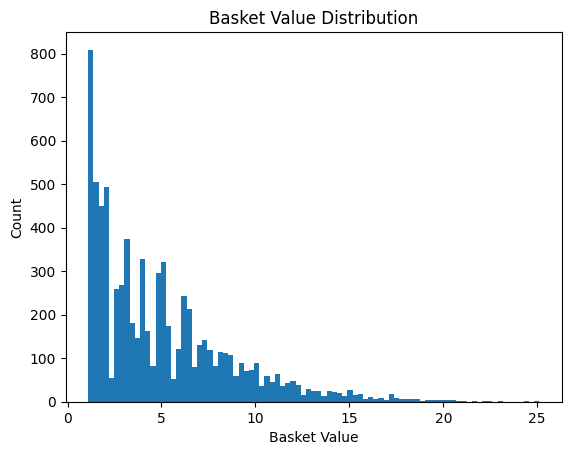

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['basket_value'], bins=87)
plt.title('Basket Value Distribution')
plt.xlabel('Basket Value')
plt.ylabel('Count')
plt.show()

The histogram of the 'basket_value' variable shows a skewed right distribution, which indicates that there are relatively few high-value purchases that are driving up the overall average basket value.In this case, the histogram shows that there are a small number of customers who are making large purchases, while the majority of customers are making smaller purchases.This is reflected in the long tail stretching out to the right of the histogram, which indicates that there are relatively few high-value purchases compared to the number of low to medium-value purchases.

Now we are going for the box plot visualisation:

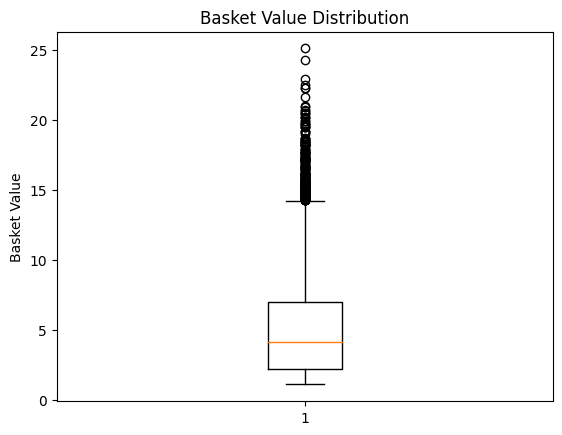

In [59]:
plt.boxplot(data['basket_value'])
plt.title('Basket Value Distribution')
plt.ylabel('Basket Value')
plt.show()

The box represents the middle 50% of the data,based on this plot, we can see that the 'basket_value' variable is positively skewed, with a long tail of high values that fall outside of the range of the rest of the data. The median value is relatively low compared to the range of values in the data, which is a common characteristic of positively skewed data.

There are several outliers (represented by the dots outside the whiskers) that fall far outside of the range of the rest of the data.


**Together, these two plots suggest that the majority of customers have relatively low basket values, but there are a few customers with very high basket values that are driving up the overall distribution.**

Now we want to study certain products in our data.So we will replace the Item columns with the products that we want.Also we will make binary values,if the costumers bought the product is equal to 1.

In [86]:
# Define the items to keep
items_to_keep = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'sodα', 'cream']

# Insert new columns for each item in items_to_keep
for item in items_to_keep:
    data[item] = data.apply(lambda row: 1 if item in str(row.values) else 0, axis=1)

Now are going to delete the Item columns because we dont need them anymore and print thre results.

In [87]:
# Drop the Item columns
data.drop(columns=[f'Item_{i}' for i in range(1, 33)], inplace=True)
data.head()

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,sodα,cream
0,1,1.1,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,1.2,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,2.5,66,0,0,1,1,0,0,0,0,0,0,0,0,0


Now we are going to change the basket_value into 3 new types, low_value_basket, medium_value_basket and high_value_basket.

**low_value_basket**:if the basket_value column is less than half of the average value 

**medium_value_basket**: if the value in the basket_value column is greater than or equal to half of the average value but less than the average value itself.


**high_value_basket**:if the value in the basket_value column is greater than or equal to the average value.

In [88]:
# Calculate average basket value
avg_basket_value = data['basket_value'].mean()

# Create new column for basket category
data.insert(2, 'basket_category', '')

# Loop through rows and assign basket category based on basket value
for i, row in data.iterrows():
    if row['basket_value'] < avg_basket_value/2:
        data.at[i, 'basket_category'] = 'low_value_basket'
    elif row['basket_value'] >= avg_basket_value/2 and row['basket_value'] < avg_basket_value*2:
        data.at[i, 'basket_category'] = 'medium_value_basket'
    else:
        data.at[i, 'basket_category'] = 'high_value_basket'

# Drop original basket value column
data.drop(columns=['basket_value'], inplace=True)

data.head()

,id,basket_category,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,sodα,cream
0,1,low_value_basket,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,medium_value_basket,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,low_value_basket,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,medium_value_basket,7,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,low_value_basket,66,0,0,1,1,0,0,0,0,0,0,0,0,0


Now we are going to visual our data with histogram for the basket_category.Also heatmaps can be especially useful when working with large datasets, as they can quickly reveal relationships and trends that might be difficult to see otherwise.So our binary data will be seen with heatmap.


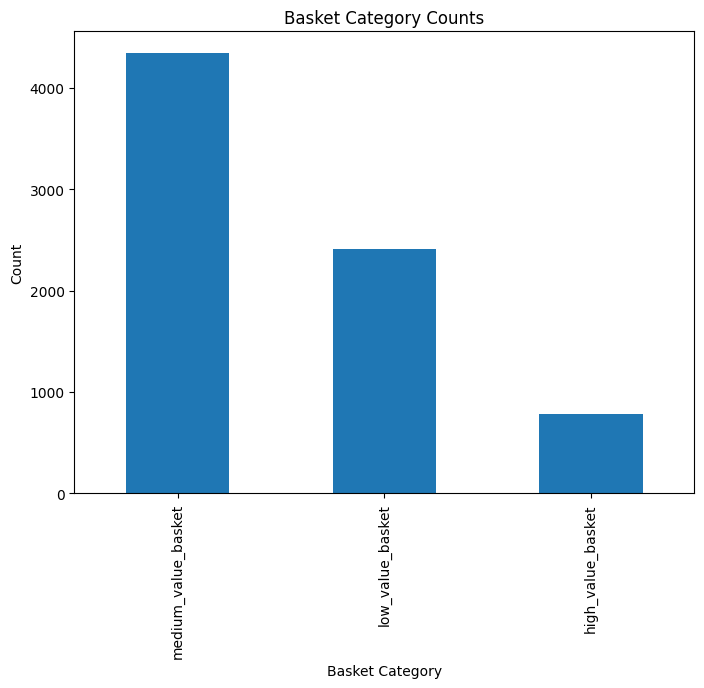

In [89]:
# Get counts of each basket category
category_counts = data['basket_category'].value_counts()

# Create bar chart
category_counts.plot(kind='bar', figsize=(8,6))
plt.xlabel('Basket Category')
plt.ylabel('Count')
plt.title('Basket Category Counts')
plt.show()

<Axes: >

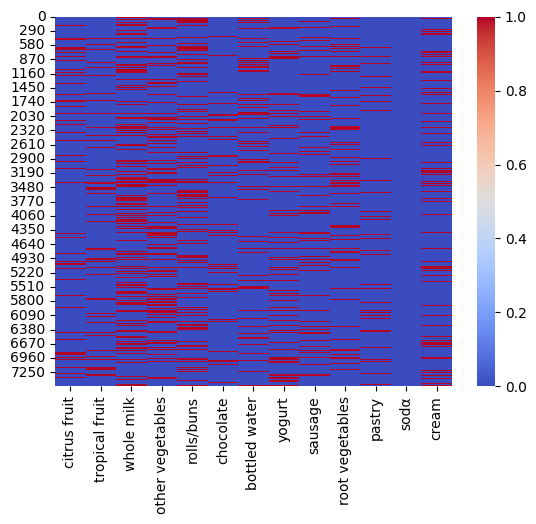

In [90]:
import seaborn as sns
# Heatmap 

# Select only the item columns
item_cols = data.columns[3:]

# Create a new DataFrame with only the item columns
binary_data_items = data[item_cols]

# Create a heatmap of the binary data
sns.heatmap(binary_data_items, cmap='coolwarm', cbar=True)

**The histograms showed that most customers are buying medium_value_basket portions, while a smaller number of customers are making larger purchases. The heatmap also showed that with our biary data, there are very few customers who buy all of the products in our dataset, while most customers only buy a small number of items.**

# **Exercise 2. Learning association rules with the Apriori method**